In [1]:
%cd ..

/home/alex404/code/retinal-rl


In [2]:
import numpy as np
from scipy import stats

import matplotlib as mpl

mpl.use("Qt5Cairo")

import matplotlib.style as mplstyle

#mplstyle.use("fast")

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
import black
import jupyter_black

jupyter_black.load(
    lab=False,
    line_length=50,
)

In [4]:
sim_out = np.load(
    "train_dir/analyze-tester/analyze_out.npy",
    allow_pickle=True,
).tolist()

In [5]:
imgs = sim_out["all_img"]
hlths = sim_out["all_health"]
img = imgs[:, :, :, 0]
fltimg = np.reshape(img, (-1, 3))
t_max = imgs.shape[3]
smps = 1000

print("Images dimensions:")
print(imgs.shape)

Images dimensions:
(72, 128, 3, 500)


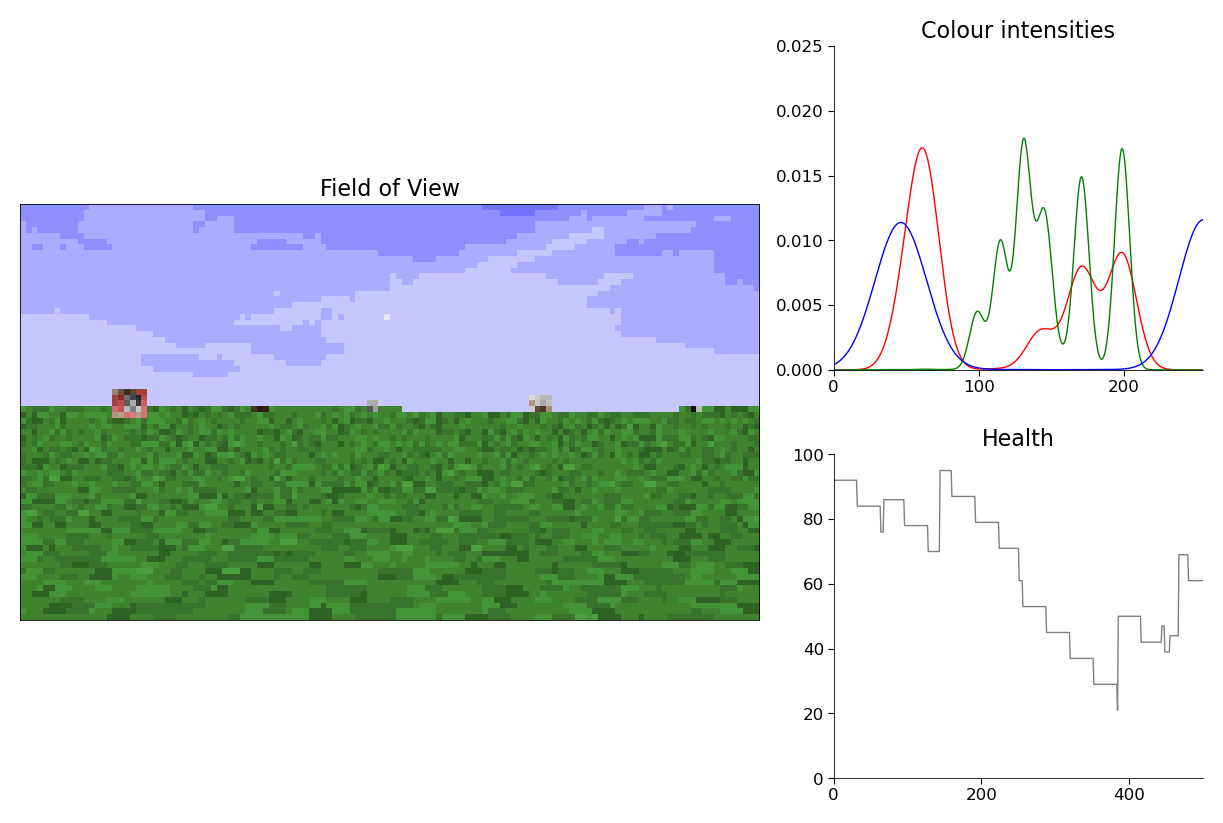

In [6]:
mosaic = """
aab
aac
"""


with plt.style.context(
    "notebooks/tutorial_style.txt"
):
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=(6, 4),
        facecolor="white",
        dpi=200,
        layout="constrained",
    )

    imax = ax_dict["a"]
    clrax = ax_dict["b"]
    hlthax = ax_dict["c"]

    # FoV
    imax.set_title("Field of View")
    imax.set_xticks([])
    imax.set_yticks([])
    im = imax.imshow(img)
    imax.spines["top"].set_visible(True)
    imax.spines["right"].set_visible(True)

    # Colour distribution
    clrax.set_title("Colour intensities")
    clrax.set_xlim([0, 255])
    clrax.set_ylim([0, 0.025])
    crng = np.linspace(0, 255, smps)

    rkde = stats.gaussian_kde(fltimg[:, 0])
    gkde = stats.gaussian_kde(fltimg[:, 1])
    bkde = stats.gaussian_kde(fltimg[:, 2])

    (rline,) = clrax.plot(
        crng,
        rkde(crng),
        color="red",
    )
    (gline,) = clrax.plot(
        crng,
        gkde(crng),
        color="green",
    )
    (bline,) = clrax.plot(
        crng,
        bkde(crng),
        color="blue",
    )

    # Health dynamics
    hlthax.set_title("Health")
    hlthax.set_xlim([0, t_max])
    hlthax.set_ylim([0, 100])
    hrng = np.linspace(0, t_max - 1, t_max)

    (hline1,) = hlthax.plot(
        hrng,
        hlths,
        color="grey",
    )
    (hline2,) = hlthax.plot(
        hrng[0],
        hlths[0],
        color="red",
    )

In [7]:
plt.rcParams["animation.html"] = "jshtml"

from tqdm.auto import tqdm, trange


def animate(i):
    img = imgs[:, :, :, i]
    fltimg = np.reshape(img, (-1, 3))

    rkde = stats.gaussian_kde(fltimg[:, 0])
    gkde = stats.gaussian_kde(fltimg[:, 1])
    bkde = stats.gaussian_kde(fltimg[:, 2])

    im.set_array(img)

    rline.set_ydata(rkde(crng))
    gline.set_ydata(gkde(crng))
    bline.set_ydata(bkde(crng))

    hline2.set_data(hrng[0:i], hlths[0:i])


anim = FuncAnimation(
    fig,
    animate,
    frames=tqdm(
        range(0, t_max),
        # range(0, 50),
        desc="Generating simulation",
    ),  # t_max,
    interval=1000 / 35,
)

from IPython.display import HTML

HTML(anim.to_html5_video())

# anim.save(
#    "foo.mp4",
#    fps=35,
#    extra_args=["-vcodec", "libx264"],
# )

Generating simulation:   0%|          | 0/500 [00:00<?, ?it/s]

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1200x800', '-pix_fmt', 'rgba', '-r', '35.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmpnu9a3nuj/temp.m4v']' returned non-zero exit status 255.